# Fraud Detection System

## Importing Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

## Loading Data

In [50]:
df = pd.read_csv('/content/creditcard_2023.csv')

In [51]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [52]:
# sns.pairplot(df)
# plt.show()

In [53]:
df = df.drop(['id'],axis=1)

## Checking for Missing Values

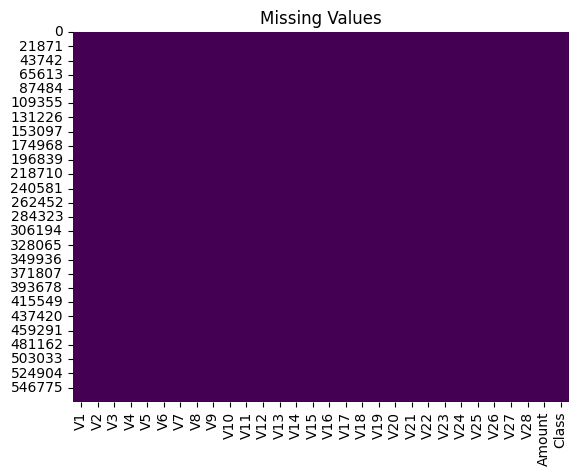

In [54]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

In [55]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [56]:
df = df.dropna()

In [106]:
missing = df.isnull()

In [107]:
with open('missingvalues.pkl', 'wb') as file:
    pickle.dump(missing, file)

## Outlier Detection

The difference in the amount attribute is normal for a fraud detection dataset so, we will not apply any outlier removal method on it

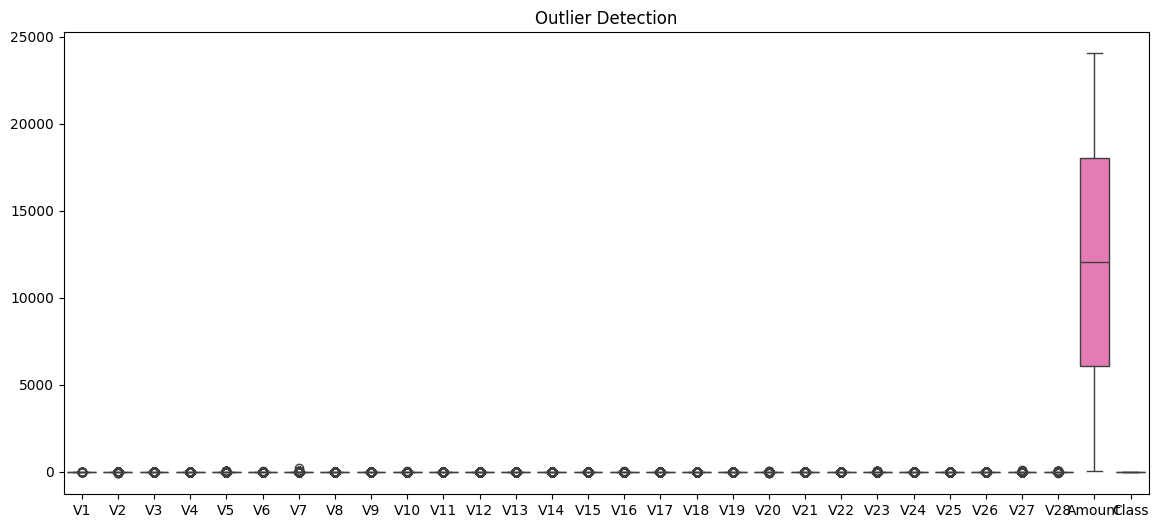

In [58]:
plt.figure(figsize=(14,6))
sns.boxplot(df)
plt.title('Outlier Detection')
plt.show()

In [59]:
numeric_df = df.select_dtypes(include=['number'])

## Data Distribution

Data is well distributed. Few attributes show skewness but that is important for detection of unusual activity.

In [60]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Skewness: {df[col].skew()}")
    print("-" * 40)

Column: V1
Skewness: -0.08341717301015879
----------------------------------------
Column: V2
Skewness: -1.397951923713946
----------------------------------------
Column: V3
Skewness: 0.014622213363246254
----------------------------------------
Column: V4
Skewness: -0.04416892714770696
----------------------------------------
Column: V5
Skewness: 1.5064136757634041
----------------------------------------
Column: V6
Skewness: -0.2016110101307477
----------------------------------------
Column: V7
Skewness: 19.026866097533325
----------------------------------------
Column: V8
Skewness: 0.2999722258586845
----------------------------------------
Column: V9
Skewness: 0.17105746155506976
----------------------------------------
Column: V10
Skewness: 0.7404135529207346
----------------------------------------
Column: V11
Skewness: -0.02089056131978458
----------------------------------------
Column: V12
Skewness: 0.06675895200237957
----------------------------------------
Column: V13
Sk

In [61]:
numeric_df = numeric_df.drop(['Class'],axis=1)

## Splitting

In [62]:
x = df.drop(['Class'],axis=1)
y = df['Class']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Scaling

In [64]:
scaler = StandardScaler()

In [65]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Data Balancing

In [66]:
y_train.value_counts()

,count
Class,
0,227565
1,227339


Data is already balanced therefore there no need to use any method for balancing it.

## HyperParameter Tuning

In [67]:
# param_dist = {
#     'LogisticRegression': {
#         'model': LogisticRegression(),
#         'params': {
#             'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#             'C': np.logspace(-3, 3, 10),
#             'solver': ['liblinear', 'saga'],
#             'max_iter': [100, 500, 1000]
#         }
#     },
#     'RandomForestClassifier': {
#         'model': RandomForestClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'criterion': ['gini', 'entropy'],
#             'max_depth': [None, 10, 20],
#             'min_samples_split': [2, 5],
#             'min_samples_leaf': [1, 2],
#         }
#     },
#     'GradientBoostingClassifier': {
#         'model': GradientBoostingClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': np.logspace(-2, 0, 5),
#             'max_depth': [3, 5, 7],
#             'min_samples_split': [2, 5],
#             'min_samples_leaf': [1, 2],
#         }
#     },
#     'XGBClassifier': {
#         'model': XGBClassifier(eval_metric='logloss'),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': np.logspace(-2, 0, 5),
#             'max_depth': [3, 5, 7],
#             'subsample': [0.8, 1.0],
#             'colsample_bytree': [0.8, 1.0]
#         }
#     }
# }

# best_models = {}
# for name, config in param_dist.items():
#     print(f"Performing RandomizedSearchCV for {name}...")
#     random_search = RandomizedSearchCV(
#         estimator=config['model'],
#         param_distributions=config['params'],
#         n_iter=20,  # Number of random samples to test
#         cv=5,
#         scoring='accuracy',
#         verbose=1,
#         n_jobs=-1,
#         random_state=42
#     )
#     random_search.fit(x_train, y_train)  # Training data
#     best_models[name] = random_search.best_estimator_
#     print(f"Best parameters for {name}: {random_search.best_params_}")
#     print(f"Best cross-validation score for {name}: {random_search.best_score_}")
#     print("-" * 50)

# # Evaluate the best models on testing data
# for name, model in best_models.items():
#     print(f"Evaluating {name} on the testing data...")
#     y_pred = model.predict(x_test)  # Testing data predictions
#     print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
#     print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
#     print("-" * 50)

In [68]:
LR = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter = 500, C= 10.0)

In [69]:
LR.fit(x_train,y_train)

LogisticRegression(C=10.0, max_iter=500, penalty='l1', solver='liblinear')

In [70]:
LR.score(x_train,y_train)

0.9649068814519107

In [71]:
with open('LR.pkl', 'wb') as file:
    pickle.dump(LR, file)

In [72]:
lr_pred = LR.predict(x_test)

In [73]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
RF.score(x_train,y_train)

1.0

In [75]:
with open('RF.pkl', 'wb') as file:
    pickle.dump(RF, file)

In [76]:
RF_pred = RF.predict(x_test)

In [77]:
GB = GradientBoostingClassifier()

In [78]:
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [79]:
with open('GB.pkl', 'wb') as file:
    pickle.dump(GB, file)

In [80]:
GB.score(x_train,y_train)

0.9797473752703867

In [81]:
GB_pred = GB.predict(x_test)

In [82]:
xgb = XGBClassifier()

In [83]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [84]:
with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [85]:
xgb.score(x_train,y_train)

0.9999934052019767

In [86]:
xgb_pred = xgb.predict(x_test)

## Evaluation

In [87]:
models = {
    "Logistic Regression": LR,
    "Random Forest": RF,
    "Gradient Boosting": GB,
    "XGBoost":xgb
}

In [88]:
for model_name, model in models.items():
  if len(np.unique(y_test)) > 2:  # Multi-class case
          roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
          print(f"ROC AUC for {model_name}: {roc_auc:.4f}")
  print("\n")

### ROC-Curves

#### Logistic Regression

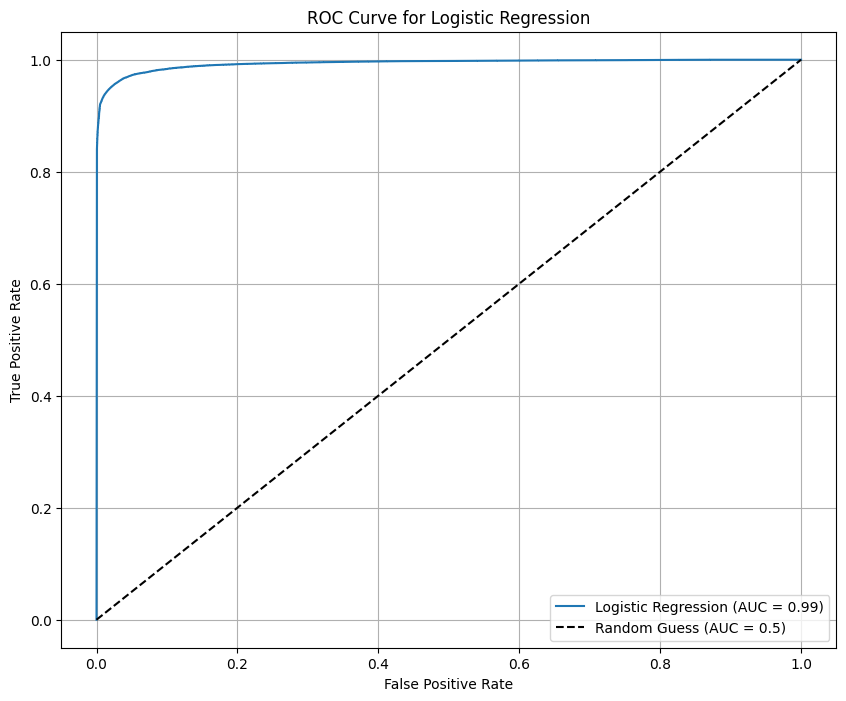

Overall ROC AUC for Logistic Regression: 0.9934
ROC data with actual and predicted labels saved successfully.


In [89]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_score = LR.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Logistic Regression: {roc_auc:.4f}")

data_to_save = {
    "y_score": y_score,
    "fpr": fpr,
    "tpr": tpr,
    "roc_auc": roc_auc
}

# Save the data to a pickle file
import pickle
with open("roc_data_LR.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

print("ROC data with actual and predicted labels saved successfully.")

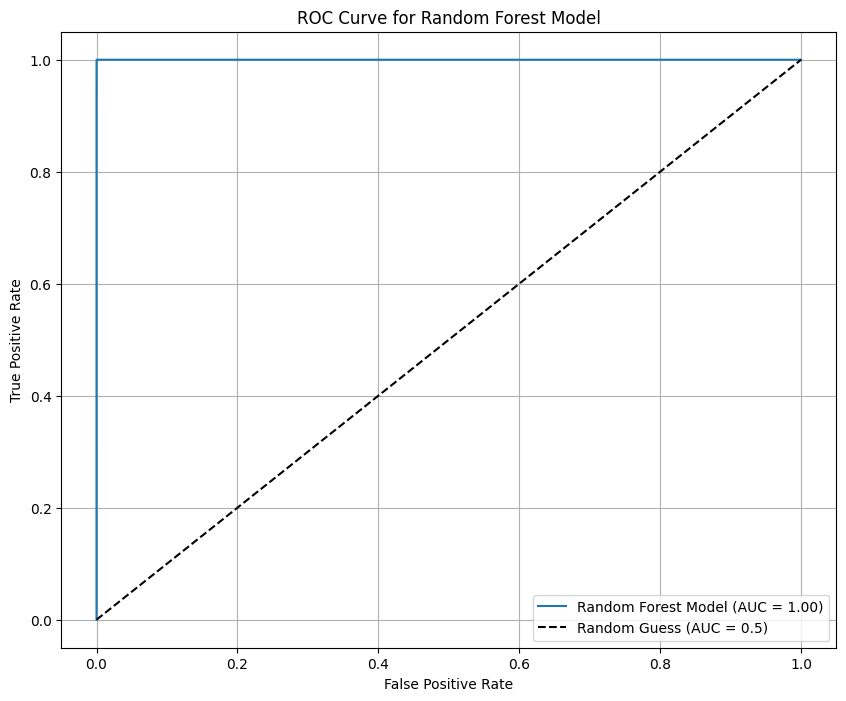

Overall ROC AUC for Random Forest Model: 1.0000
ROC data with actual and predicted labels saved successfully.


In [90]:
y_score = RF.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Random Forest Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Random Forest Model: {roc_auc:.4f}")


data_to_save = {
    "y_score": y_score,
    "fpr": fpr,
    "tpr": tpr,
    "roc_auc": roc_auc
}

# Save the data to a pickle file
with open("roc_data_RF.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

print("ROC data with actual and predicted labels saved successfully.")

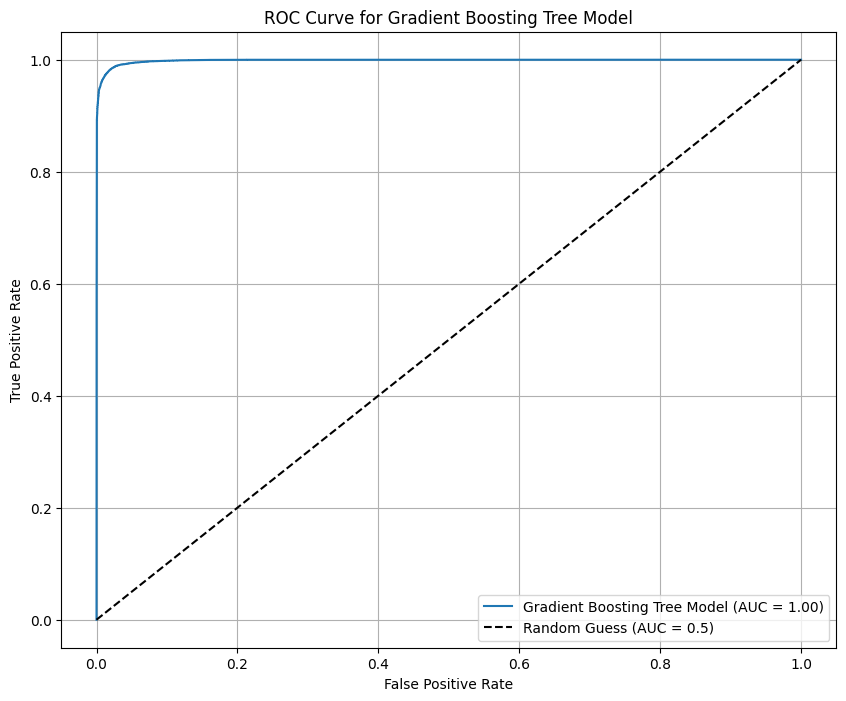

Overall ROC AUC for Gradient Boosting Tree Model: 0.9986
ROC data with actual and predicted labels saved successfully.


In [91]:
y_score = GB.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Gradient Boosting Tree Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting Tree Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Gradient Boosting Tree Model: {roc_auc:.4f}")


data_to_save = {
    "y_score": y_score,
    "fpr": fpr,
    "tpr": tpr,
    "roc_auc": roc_auc
}

# Save the data to a pickle file
with open("roc_data_GB.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

print("ROC data with actual and predicted labels saved successfully.")

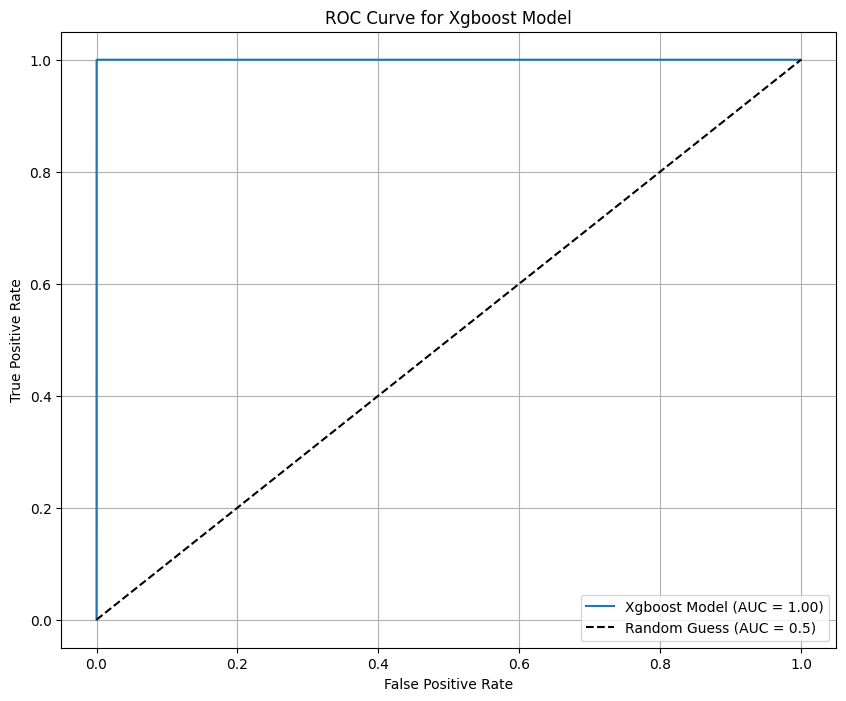

Overall ROC AUC for XGBoost Model: 1.0000
ROC data with actual and predicted labels saved successfully.


In [92]:
y_score = xgb.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Xgboost Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Xgboost Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for XGBoost Model: {roc_auc:.4f}")


data_to_save = {
    "y_score": y_score,
    "fpr": fpr,
    "tpr": tpr,
    "roc_auc": roc_auc
}

# Save the data to a pickle file
with open("roc_data_xgb.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

print("ROC data with actual and predicted labels saved successfully.")

### Classification Report

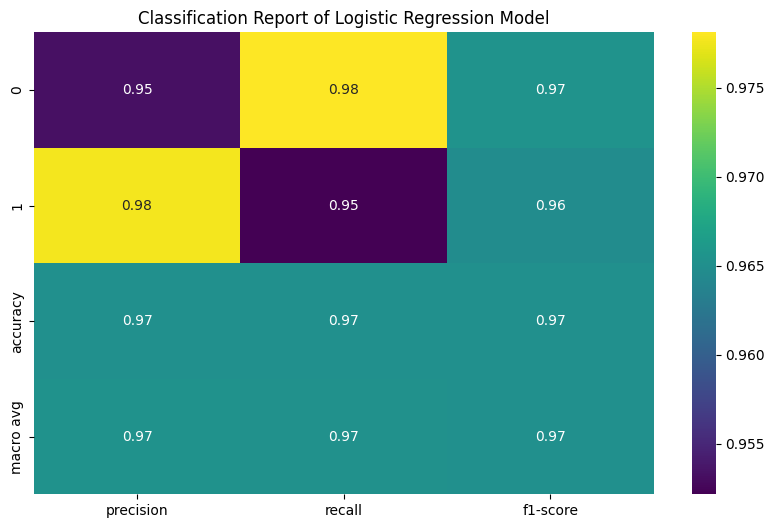

In [93]:
LR_report = classification_report(y_test, lr_pred, output_dict=True)
# Convert the classification report to a DataFrame
LR_report_df = pd.DataFrame(LR_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(LR_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Logistic Regression Model")
plt.show()


with open('class_LR.pkl', 'wb') as file:
    pickle.dump(LR_report_df, file)

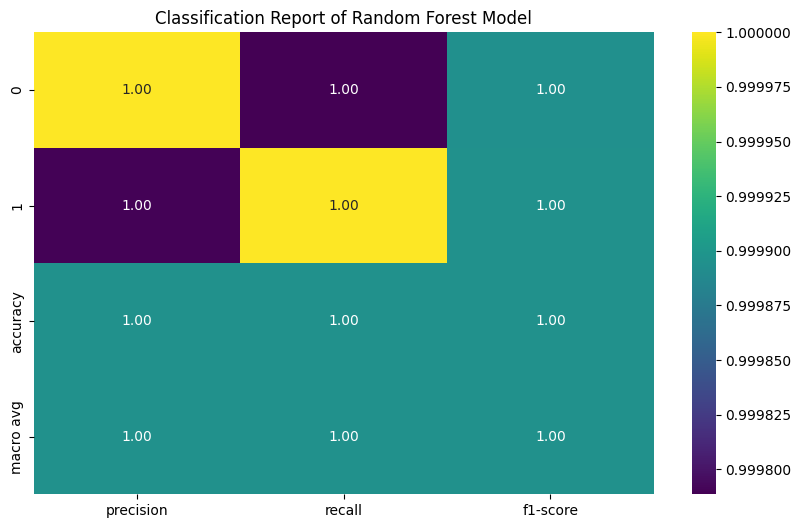

In [94]:
RF_report = classification_report(y_test, RF_pred, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Random Forest Model")
plt.show()

with open('class_RF.pkl', 'wb') as file:
    pickle.dump(RF_report_df, file)

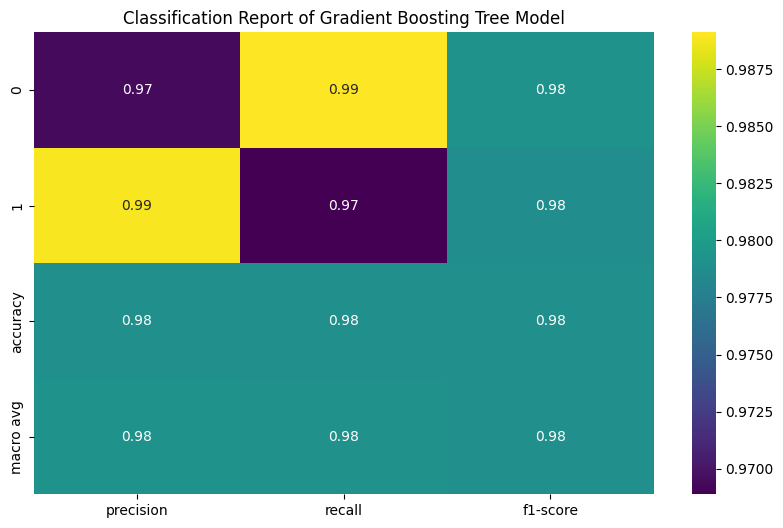

In [95]:
GB_report = classification_report(y_test, GB_pred, output_dict=True)
# Convert the classification report to a DataFrame
GB_report_df = pd.DataFrame(GB_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(GB_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Gradient Boosting Tree Model")
plt.show()

with open('class_GB.pkl', 'wb') as file:
    pickle.dump(GB_report_df, file)

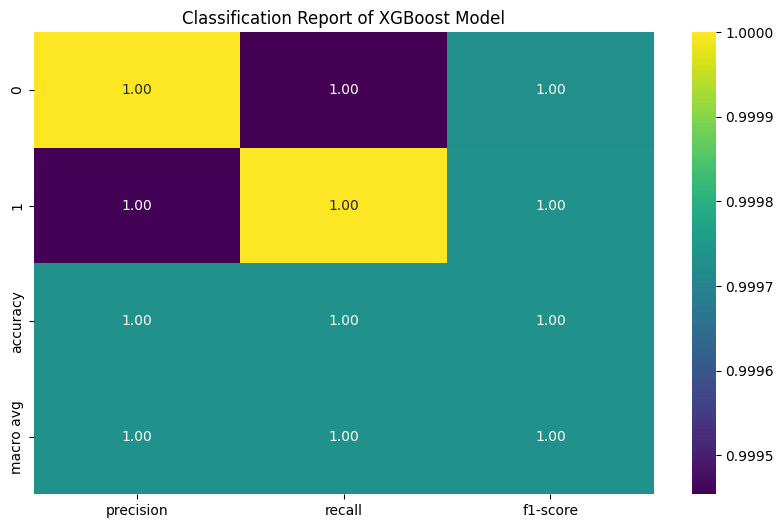

In [96]:
xgb_report = classification_report(y_test, xgb_pred, output_dict=True)
# Convert the classification report to a DataFrame
xgb_report_df = pd.DataFrame(xgb_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(xgb_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of XGBoost Model")
plt.show()

with open('class_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_report_df, file)

### Confusion Matrix

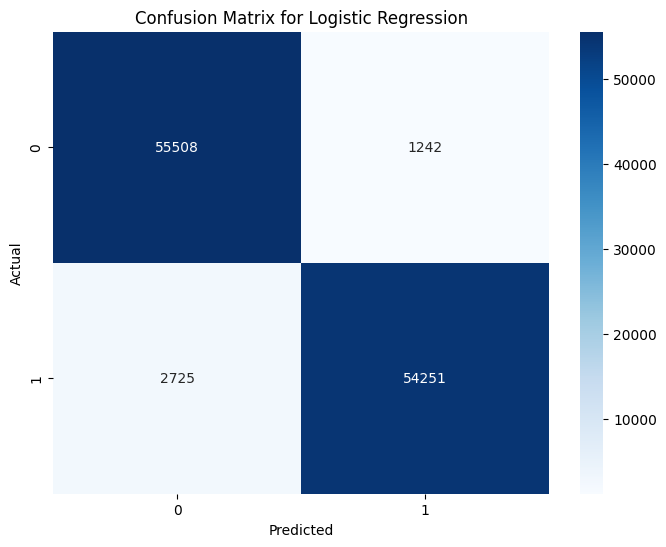

In [97]:
y_test_pred = LR.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

with open('conf_LR.pkl', 'wb') as file:
    pickle.dump(cm, file)

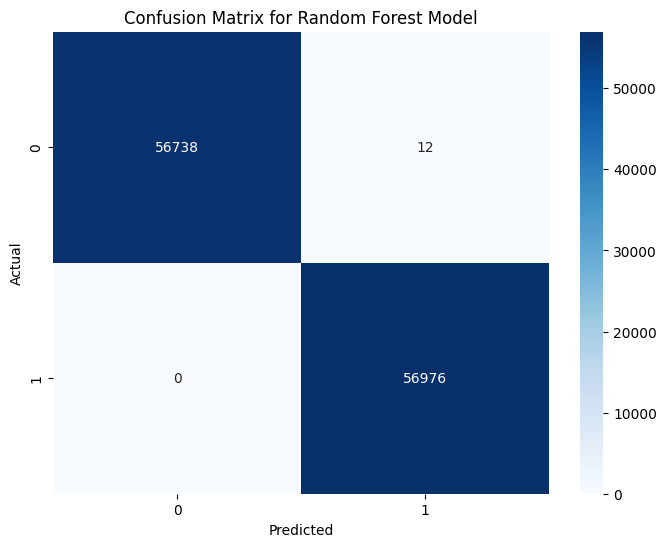

In [98]:
y_test_pred = RF.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


with open('conf_RF.pkl', 'wb') as file:
    pickle.dump(cm, file)

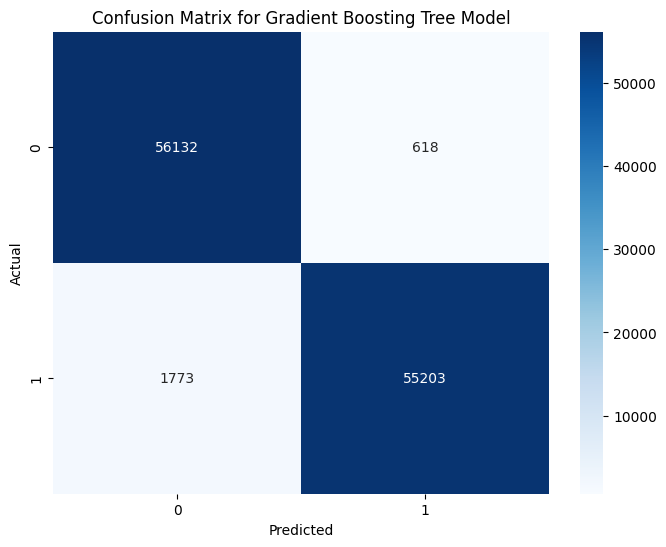

In [99]:
y_test_pred = GB.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Tree Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


with open('conf_GB.pkl', 'wb') as file:
    pickle.dump(cm, file)

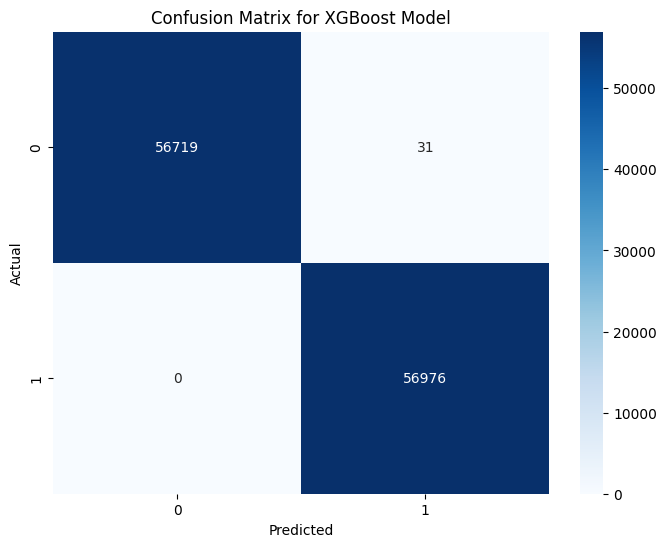

In [100]:
y_test_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


with open('conf_xgb.pkl', 'wb') as file:
    pickle.dump(cm, file)

### Accuracies

In [101]:
models = {
    'Logistic Regression': LR,
    'Random Forest': RF,
    'Gradient Boosting Tree': GB,
    'Xgboost':xgb
}

/tmp/ipython-input-3256035179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


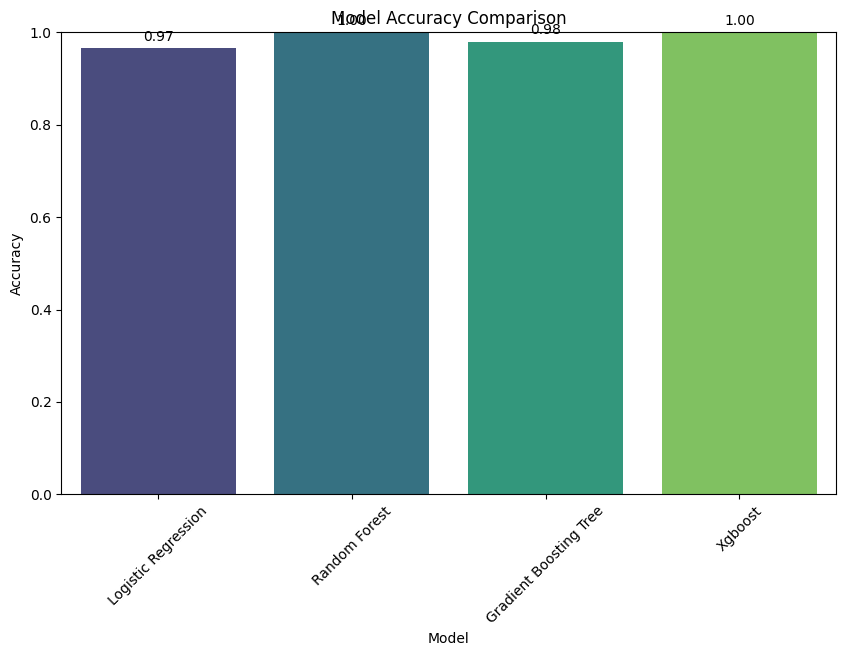

In [102]:
accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

for i, (model_name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [103]:
accuracies

{'Logistic Regression': 0.965117914988657,
 'Random Forest': 0.9998944832316269,
 'Gradient Boosting Tree': 0.9789757839016584,
 'Xgboost': 0.9997274150150361}

In [104]:
with open('accuracies.pkl', 'wb') as file:
    pickle.dump(accuracies, file)

In [105]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)